In [1]:
### Data from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
### Credit Card Fraud Prediction/Detection

import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('creditcard.csv',header=0)
data=data.dropna() # Remove missing values or NA
print(data.shape)
print(list(data.columns))

(284807, 31)
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Type']


In [3]:
data
###  dataset provides the credit card users' information. It includes 284,807 records/cases and 31 fields.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Type
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
count_fraud = len(data[data['Type']==1])
count_nofraud = len(data[data['Type']==0])
pct_of_fraud = count_fraud/(count_fraud+count_nofraud)
print("percentage of fraud cases is", pct_of_fraud*100)

percentage of fraud cases is 0.1727485630620034


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Type
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
### Note % of fraud vs nofraud. Check for imbalance -- too few frauds
### Explore features mean of fraud cases vs. nofraud cases.
data.groupby('Type').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Type,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Observations: The feature V# means of the fraud type 1 and nofraud type 0 are quite different.

In [7]:
data1=data.iloc[:,1:30]
data1
# Did not include last col Type as this target need not be standardized

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [8]:
# Normalization of all features
from sklearn.preprocessing import StandardScaler #from sklearn import preprocessing done earlier
scaler = StandardScaler().fit(data1)  # this computes means and sd to standardize
data2 = scaler.transform(data1)       # this does the standardization with computed means, sds
data3=pd.DataFrame(data2,index=data1.index,columns=data1.columns)             
# above step converts array from last step back to pandas dataframe, also puts back indexes V's

In [9]:
data3

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,4.000715,...,1.914365,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151
284803,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,-0.896292,...,0.077330,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117
284804,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,-0.445225,...,0.001811,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839
284805,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,-0.366558,...,0.165300,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249


In [10]:
data3.describe()
# note the standardization of all features to mean 0 sd 1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,-1.535084e-15,-3.731020e-16,-2.147241e-15,9.521400e-16,5.816650e-18,2.788952e-16,2.409055e-16,2.847114e-16,1.373770e-16,1.005277e-16,...,-5.154717e-16,1.183204e-16,-7.872999e-16,-7.292598e-17,1.410321e-16,-4.790487e-16,-3.010198e-16,4.128497e-17,-3.849111e-17,3.202236e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [11]:
data4=pd.concat([data3, data["Type"]], axis=1) 
# argument incl axis=1 so it concats by columns
# puts back the 1,0 Type column
data4

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Type
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,4.000715,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0
284803,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,-0.896292,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0
284804,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,-0.445225,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0
284805,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,-0.366558,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0


# Naive Bayes Algorithm

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Split the data into training and test sets
X = data4.drop("Type", axis=1) ## except "Type" col, rest are features
y = data4["Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# note there are 0.2 x 284,807 = 56,962 test cases

# Train the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the model
y_pred_NB = gnb.predict(X_test)

In [13]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_NB = metrics.accuracy_score(y_test, y_pred_NB)
print("Naive Bayes Accuracy:",Accuracy_NB)

Naive Bayes Accuracy: 0.9780028791123907


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_NB)
print(confusion_matrix)

[[55636  1237]
 [   16    73]]


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56873
           1       0.06      0.82      0.10        89

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [16]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_NB = gnb.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_NB)  
    # matches y_test of 1's and 0's versus pred prob of 1's for each of the 56,962 test cases
    # sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    # this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_NB = metrics.auc(fpr, tpr)
    # sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_NB

0.9454815252671189

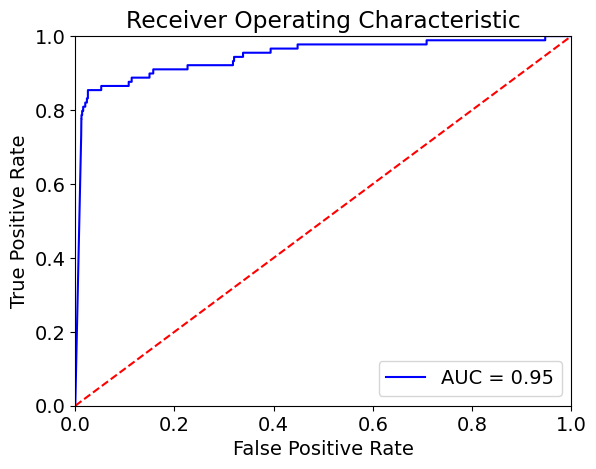

In [17]:
import matplotlib.pyplot as plt
plt.rc("font", size=14)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_NB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# k-Nearest Neighbor Algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kNN= KNeighborsClassifier(n_neighbors = 3, algorithm='auto', metric='minkowski', p=2,
     metric_params=None, n_jobs=None, weights='uniform')
# argument: Minkowski (default metric) and p=2 gives Euclidean distance
# default weight is uniform
# algorithm auto uses 'best' search method to solve min distances
# n_jobs (default none means 1): number of parallel processes to solve
kNN.fit(X_train, y_train)  
## Note the kNN.predict process next involves intense computations

KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred_kNN = kNN.predict(X_test)

C:\Users\kglim\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_kNN = metrics.accuracy_score(y_test, y_pred_kNN)
print(Accuracy_kNN)

0.9996137776061234


In [21]:
print('Test set score: {:.16f}'.format(kNN.score(X_test, y_test))) ## same computation as combined two steps above

C:\Users\kglim\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test set score: 0.9996137776061234


In [22]:
# Compare with training score
print('Training set score: {:.16f}'.format(kNN.score(X_train, y_train)))

C:\Users\kglim\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Training set score: 0.9996444951611841


In [23]:
# Notice that both training fitting accuracy score .99964 and testing accuracy score .99961
# are close so there is no overfitting in the training

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_kNN)
print(confusion_matrix)

[[56867     6]
 [   16    73]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.92      0.82      0.87        89

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
Prob1=kNN.predict_proba(X_test)[:,0]  #gives the probabilities for target variable being 0

In [27]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
print(Prob1)
# The output contains 0. , 0.333, 0.666, 1. That is,
# the 3-NN neighborhood could have 0.0 Type1, 1 x Type 1 (1/3)
# 2 x Type 1 (2/3) and 3 x Type 1 (1.0)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         

In [28]:
Prob2=kNN.predict_proba(X_test)[:,1] #gives the probabilities for target variable being 1
print(Prob2)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [29]:
len(Prob1), len(Prob2)

(56962, 56962)

In [30]:
Prob3=np.add(Prob1,Prob2) # element by element sum of arrays Prob 1 and Prob2
print(np.sum(Prob3)) # numpy provides this np.sum to add all elements in array
# results show that 

56962.0


In [31]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(y_test, Prob2)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_kNN = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_kNN
### But note that for k-NN, prob is % of points = 1 in neighborhood

0.9156637586169224

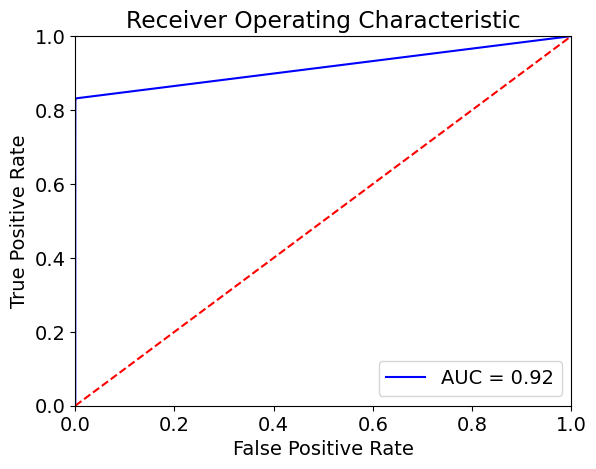

In [32]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_kNN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Next try k=5

In [33]:
from sklearn.neighbors import KNeighborsClassifier
kNN5= KNeighborsClassifier(n_neighbors = 5, algorithm='auto', metric='minkowski', p=2)
kNN5.fit(X_train, y_train)  
## Note the kNN.predict process next involves intense computations

KNeighborsClassifier()

In [34]:
y_pred_kNN5 = kNN5.predict(X_test)

C:\Users\kglim\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_kNN5 = metrics.accuracy_score(y_test, y_pred_kNN5)
print(Accuracy_kNN5)

0.9994908886626171


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_kNN5)
print(confusion_matrix)

[[56863    10]
 [   19    70]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_kNN5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.88      0.79      0.83        89

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(y_test, kNN5.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_kNN5 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_kNN5

0.9156052802054331

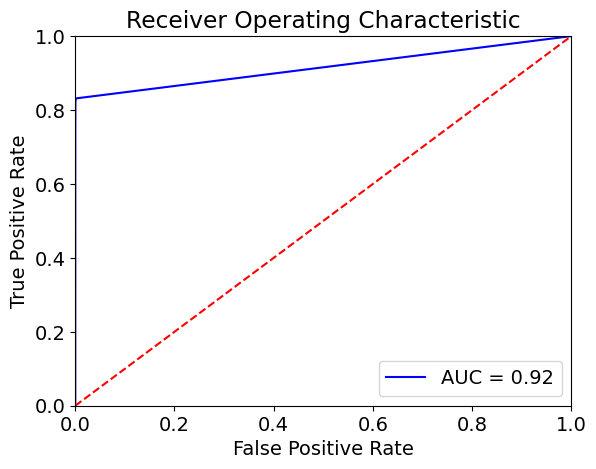

In [39]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_kNN5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
# Model accuracy is above 90%. But if Type 1 (Fraud case) is 99.83%, then one could just make all predictions = fraud case, and 
# outcome will be 99.83%. The latter is also called the null accuracy.
# However, here non-fraud case is 99.83% while fraud case is only 0.17%. We can make all predictions as
# non-fraud and achieve 99.83% accuracy. However, this serves no purpose as the task is to predict fraud cases for business
# reasons. 

# Next try k=7

In [41]:
from sklearn.neighbors import KNeighborsClassifier
kNN7= KNeighborsClassifier(n_neighbors = 7, algorithm='auto', metric='minkowski', p=2)
kNN7.fit(X_train, y_train)  
## Note the kNN.predict process next involves intense computations

KNeighborsClassifier(n_neighbors=7)

In [42]:
y_pred_kNN7 = kNN7.predict(X_test)

C:\Users\kglim\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_kNN7 = metrics.accuracy_score(y_test, y_pred_kNN7)
print(Accuracy_kNN7)

0.9994557775359011


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_kNN7)
print(confusion_matrix)

[[56862    11]
 [   20    69]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_kNN7))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.86      0.78      0.82        89

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [46]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(y_test, kNN7.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_kNN7 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_kNN7

0.9268009325726135

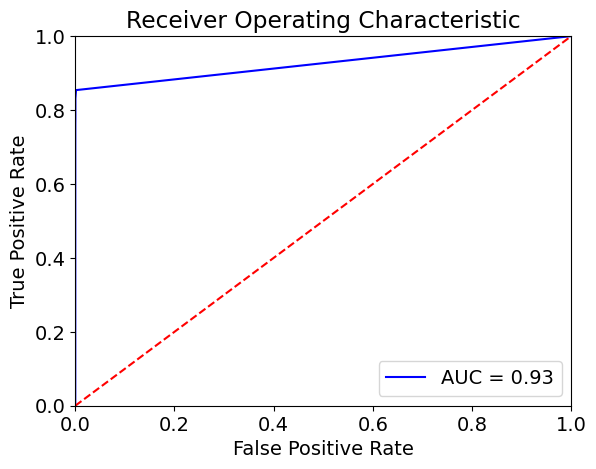

In [47]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_kNN7)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Next try k=15

In [48]:
from sklearn.neighbors import KNeighborsClassifier
kNN15= KNeighborsClassifier(n_neighbors = 15, algorithm='auto', metric='minkowski', p=2)
kNN15.fit(X_train, y_train)  
## Note the kNN.predict process next involves intense computations

KNeighborsClassifier(n_neighbors=15)

In [49]:
y_pred_kNN15 = kNN15.predict(X_test)

C:\Users\kglim\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [50]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
Accuracy_kNN15 = metrics.accuracy_score(y_test, y_pred_kNN15)
print(Accuracy_kNN15)

0.9994382219725431


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_kNN15)
print(confusion_matrix)

[[56861    12]
 [   20    69]]


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_kNN15))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.85      0.78      0.81        89

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [53]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, thresholds = metrics.roc_curve(y_test, kNN15.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_kNN15 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_kNN15

0.9266660963704464

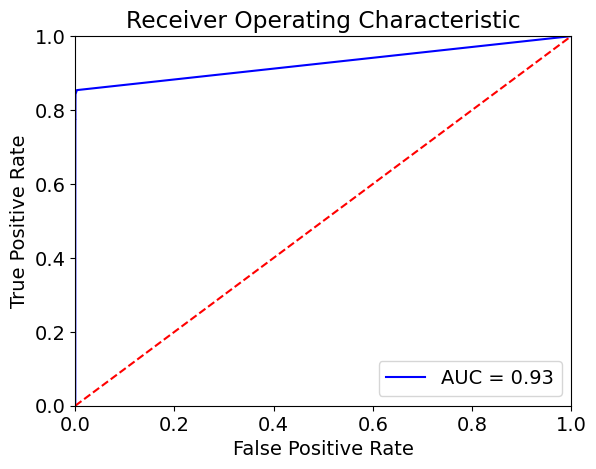

In [54]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_kNN15)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Support Vector Machines

Linear Kernel

In [55]:
from sklearn import svm
svm1 = svm.SVC(kernel='linear', C = 1.0, probability=True) # C is regularization para. Default C=1.
svm1.fit(X_train,y_train)
y_pred_svm = svm1.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm)

array([[56856,    17],
       [   20,    69]], dtype=int64)

In [57]:
accuracy_score(y_test,y_pred_svm)

0.9993504441557529

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.80      0.78      0.79        89

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [59]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# svm1=svm.SVC(probability=True) # without this, code does not recognize _proba(X_test)..
### prob=True uses logistic reg to est coeffs based on the features and SVM predicted 1's or 0's. Est
###  coefs provided ests of prob based on features. These est probs are then used in ROC
# svm1.fit(X_train,y_train) # repeat this line so ...svm1.predict_proba.. can work

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm1.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_svm = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_svm

0.9327320461892523

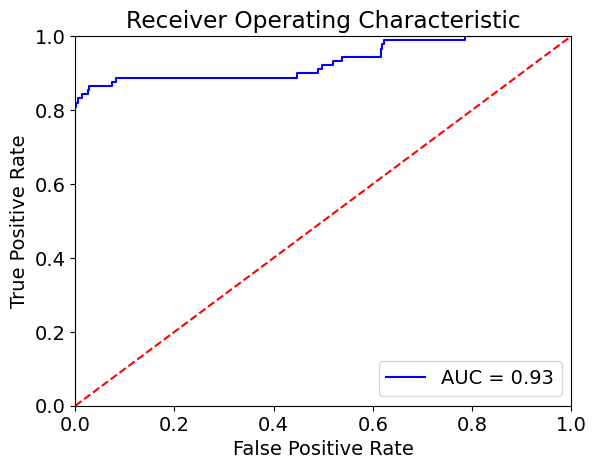

In [60]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Polynomial Kernel

In [61]:
from sklearn import svm
svm2 = svm.SVC(kernel='poly', C = 1.0, probability=True) # C is regularization para. Default C=1.
svm2.fit(X_train,y_train)
y_pred_svm2 = svm2.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm2)

array([[56863,    10],
       [   17,    72]], dtype=int64)

In [63]:
accuracy_score(y_test,y_pred_svm2)

0.9995259997893332

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.88      0.81      0.84        89

    accuracy                           1.00     56962
   macro avg       0.94      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [65]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# svm2=svm.SVC(probability=True) # without this, code does not recognize _proba(X_test)..
### prob=True uses logistic reg to est coeffs based on the features and SVM predicted 1's or 0's. Est
###  coefs provided ests of prob based on features. These est probs are then used in ROC
# svm2.fit(X_train,y_train) # repeat this line so ...svm1.predict_proba.. can work

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm2.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_svm2 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_svm2

0.8764258310997279

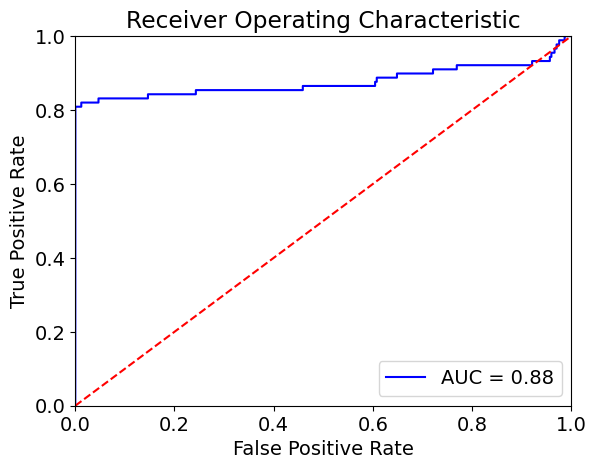

In [66]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svm2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Sigmoid Kernel

In [67]:
from sklearn import svm
svm3 = svm.SVC(kernel='sigmoid', C = 1.0, probability=True) # C is regularization para. Default C=1.
svm3.fit(X_train,y_train)
y_pred_svm3 = svm3.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm3)

array([[56838,    35],
       [   40,    49]], dtype=int64)

In [69]:
accuracy_score(y_test,y_pred_svm3)

0.9986833327481479

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.58      0.55      0.57        89

    accuracy                           1.00     56962
   macro avg       0.79      0.77      0.78     56962
weighted avg       1.00      1.00      1.00     56962



In [71]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# svm3=svm.SVC(probability=True) # without this, code does not recognize _proba(X_test)..
### prob=True uses logistic reg to est coeffs based on the features and SVM predicted 1's or 0's. Est
###  coefs provided ests of prob based on features. These est probs are then used in ROC
# svm3.fit(X_train,y_train) # repeat this line so ...svm1.predict_proba.. can work

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm3.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_svm3 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_svm3

0.7892890467366973

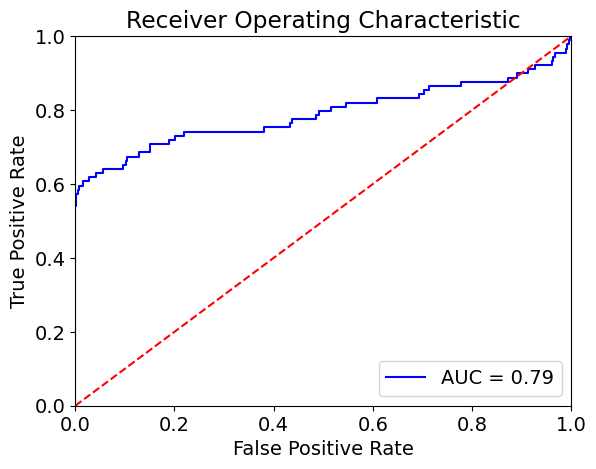

In [72]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svm3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

rbf or Gaussian Kernel

In [73]:
from sklearn import svm
svm4 = svm.SVC(kernel='rbf', C = 1.0, gamma='scale', probability=True) # C is regularization para. Default C=1.
svm4.fit(X_train,y_train)
y_pred_svm4 = svm4.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred_svm4)

array([[56869,     4],
       [   26,    63]], dtype=int64)

In [75]:
accuracy_score(y_test,y_pred_svm4)

0.9994733330992591

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svm4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.94      0.71      0.81        89

    accuracy                           1.00     56962
   macro avg       0.97      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [77]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

# svm4=svm.SVC(probability=True) # without this, code does not recognize _proba(X_test)..
### prob=True uses logistic reg to est coeffs based on the features and SVM predicted 1's or 0's. Est
###  coefs provided ests of prob based on features. These est probs are then used in ROC
# svm4.fit(X_train,y_train) # repeat this line so ...svm1.predict_proba.. can work

fpr, tpr, thresholds = metrics.roc_curve(y_test, svm4.predict_proba(X_test)[:,1])  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_svm4 = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_svm4

0.9284895954854665

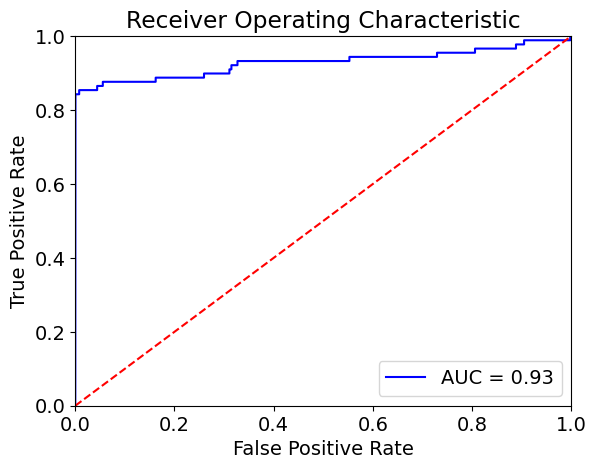

In [78]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svm4)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Compare with Logistic Regression

In [79]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=1, 
                        multi_class='multinomial',
                        solver='newton-cg')
LR = LR.fit(X_train, y_train)

y_pred_LR = LR.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.9991573329588147


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_LR)
print(confusion_matrix)

[[56865     8]
 [   40    49]]


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.86      0.55      0.67        89

    accuracy                           1.00     56962
   macro avg       0.93      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [82]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds_LR = LR.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_LR)  
    ### matches y_test of 1's and 0's versus pred prob of 1's for each of the 508 test cases
    ###    sklearn.metrics.roc_curve(y_true, y_score,...) requires y_true as 0,1 input and y_score as prob inputs
    ###    this metrics.roc_curve returns fpr, tpr, thresholds (Decreasing thresholds used to compute fpr and tpr)
roc_auc_LR = metrics.auc(fpr, tpr)
    ### sklearn.metrics.auc(fpr,tpr) returns AUC using trapezoidal rule
roc_auc_LR

0.9769063616411651

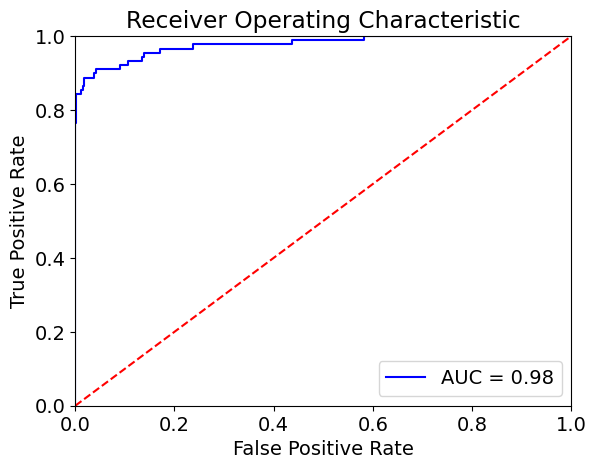

In [83]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_LR)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()